In [1]:
import simcmb
import itertools
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
Yd0 = simcmb.Ydict()
PM0 = simcmb.PS_Maker(Yd0)

In [3]:
PM0.loop_sims(user_params=True)

from 16:23:04.075404 P to 16:23:05.495512 P or 1.420108 seconds total
from 16:23:05.496106 P to 16:23:06.852616 P or 1.356510 seconds total
from 16:23:06.853081 P to 16:23:08.286798 P or 1.433717 seconds total
from 16:23:08.287332 P to 16:23:09.688861 P or 1.401529 seconds total
from 16:23:09.689370 P to 16:23:11.068091 P or 1.378721 seconds total
from 16:23:11.068520 P to 16:23:12.505879 P or 1.437359 seconds total
from 16:23:12.506423 P to 16:23:13.994521 P or 1.488098 seconds total
from 16:23:13.995060 P to 16:23:15.435117 P or 1.440057 seconds total
from 16:23:15.435639 P to 16:23:16.787396 P or 1.351757 seconds total


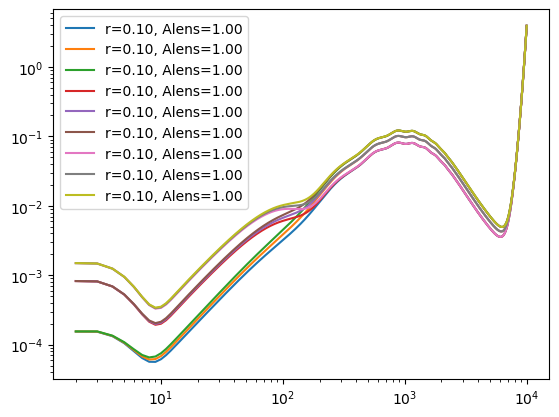

In [4]:
for r in PM0.runids:
    d, p = PM0.results[r], PM0.result_parameters[r]
    try:
        label_r = p['FORCAMB']['InitPower']['r']
    except KeyError:
        label_r = Yd0._all_params_dict['BASECAMBPARAMS']['InitPower']['r']
    try:
        label_A = p['FORCAMB']['Alens']
    except KeyError:
        label_A = Yd0._all_params_dict['BASECAMBPARAMS']['Alens']
    plt.plot(d['l'][2:], d['clBB'][2:],
             label=f"r={label_r:.2f}, Alens={label_A:.2f}")
plt.loglog()
plt.legend()
plt.show()

In [5]:
PM0.savecls(savedir="/Users/sammcd/simcmb/simcmb/outfiles/", permission='w')

In [10]:
f1 = simcmb.clplotting.flatmap(192, 5, cl_dict=PM0.results['runid_230510162304075266_002278'])

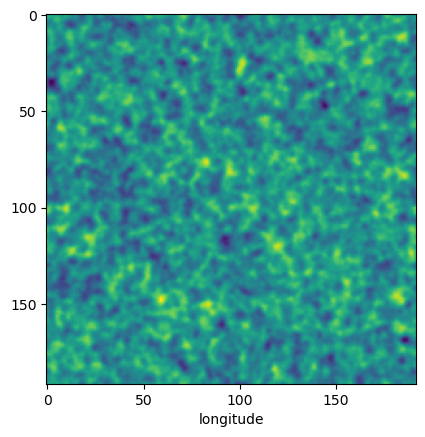

In [11]:
plt.imshow(f1.flatmap('T', seed = 0)[0])
plt.xlabel("longitude")
plt.xticks(range(0,200,50))
plt.yticks(range(0,200,50))
plt.show()

In [12]:
np.sum(f1.flatmap('T', seed = 0)[0] - f1.flatmap('T', seed = 0)[0]),\
np.sum(f1.flatmap('T', seed = 1)[0] - f1.flatmap('T', seed = 0)[0])

(1.7462298274040222e-10, -728.1322687771171)

In [13]:
f1.flatmap('TEB').shape

(3, 192, 192)

In [14]:
f1.flatmap('TQU').shape

(3, 192, 192)

In [15]:
f2 = simcmb.clplotting.flatmap(192, 5)
f2.flatmap('what')

if you don't want to restrict to a `cl_dict` dictionary, use `self._flatmap` instead


In [16]:
f1.flatmap('E'), f1.flatmap('EE'), f1.flatmap('clEE')

(array([[[-8037.303673  , -7629.03541215, -6314.55028544, ...,
           -923.68145389, -4323.75911613, -7979.63690715],
         [-6657.39878207, -3723.5781149 , -2251.76084261, ...,
            777.84913693, -4021.28691726, -6232.80074399],
         [-2112.89654673,   679.04661228,  2464.5523842 , ...,
            560.78701917, -1900.75888414, -4475.73314095],
         ...,
         [  890.11117454,  1125.26228057, -1173.49690813, ...,
           -958.70542973, -1009.38310631,   140.29054752],
         [-2187.78896608, -2778.29074019, -4656.12136487, ...,
          -1841.14468497, -2819.18327163, -3058.69499738],
         [-6808.44942618, -6688.10336901, -7699.57130466, ...,
          -1296.85762576, -4441.44117904, -6120.96069645]]]),
 array([[[ 2746.19781392,  3869.49019228,  3230.74289877, ...,
           -650.72565436,  1077.24055385,  2330.24902624],
         [ 2816.18128622,  4063.36532778,  4168.88838785, ...,
          -2257.92103267,  -574.00401068,   489.94754106],
       

In [17]:
f1.flatmap('K')

not a valid map specification


In [23]:
new_YD = simcmb.Ydict(user_config="/Users/sammcd/simcmb/simcmb/outfiles/runid_230510162304075266_002278_params.yaml")
new_PM = simcmb.PS_Maker(new_YD)

In [22]:
import h5py

In [24]:
old_cls = {}
with h5py.File("/Users/sammcd/simcmb/simcmb/outfiles/runid_230510162304075266_002278_results.h5", 'r') as f:
    for k in f:
        old_cls[k] = np.array(f[k])

In [25]:
new_cls = new_PM.get_cls()

from 16:26:08.584258 P to 16:26:09.938164 P or 1.353906 seconds total


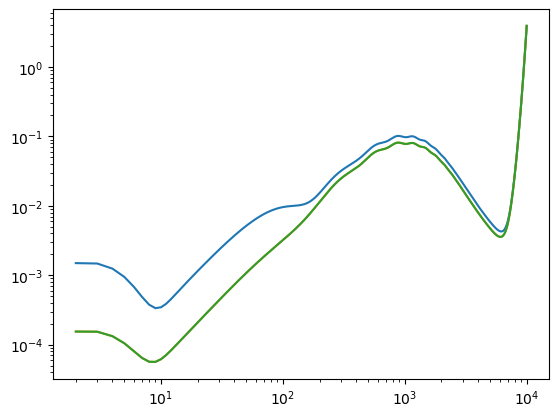

In [26]:
plt.plot(new_cls['l'][2:], new_cls['clBB'][2:])
plt.plot(new_cls['l'][2:], PM0.results['runid_230510162304075266_002278']['clBB'][2:])
plt.plot(old_cls['l'][2:], old_cls['clBB'][2:])
plt.loglog()
plt.show()